# LGM VIRTUAL INTERNSHIP PROGRAM 2022

## Task 1-Iris Flowers Classification ML Project


### Description of the task:
   * This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset            contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load        and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations      or scaling capabilities.
    

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm,datasets

### Loading Dataset

In [2]:
a=pd.read_csv("iris.csv")

In [3]:
a.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
a.shape

(150, 5)

In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
a.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
a.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [8]:
a['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

### Analysing the Dataset

In [9]:
a.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

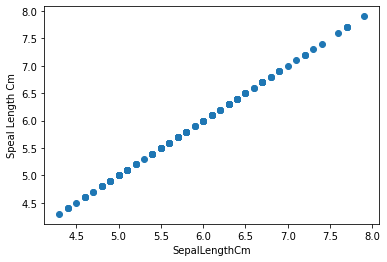

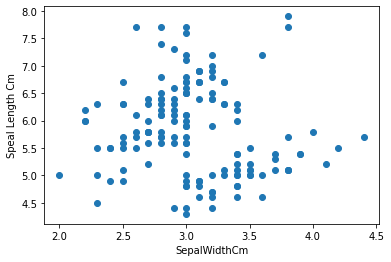

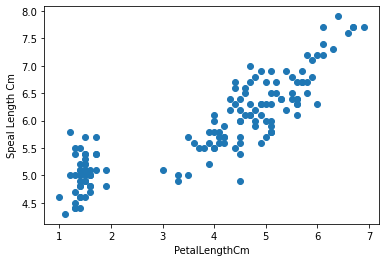

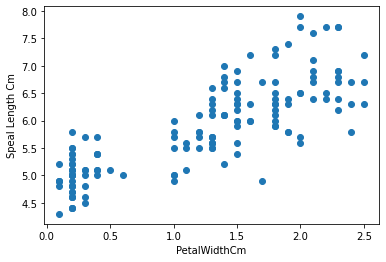

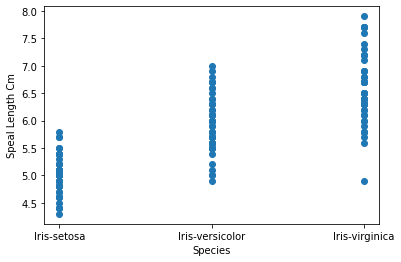

In [11]:
for i in a.columns:
    plt.scatter(a[str(i)],a['SepalLengthCm'])
    plt.xlabel(i)
    plt.ylabel("Speal Length Cm")
    plt.show()

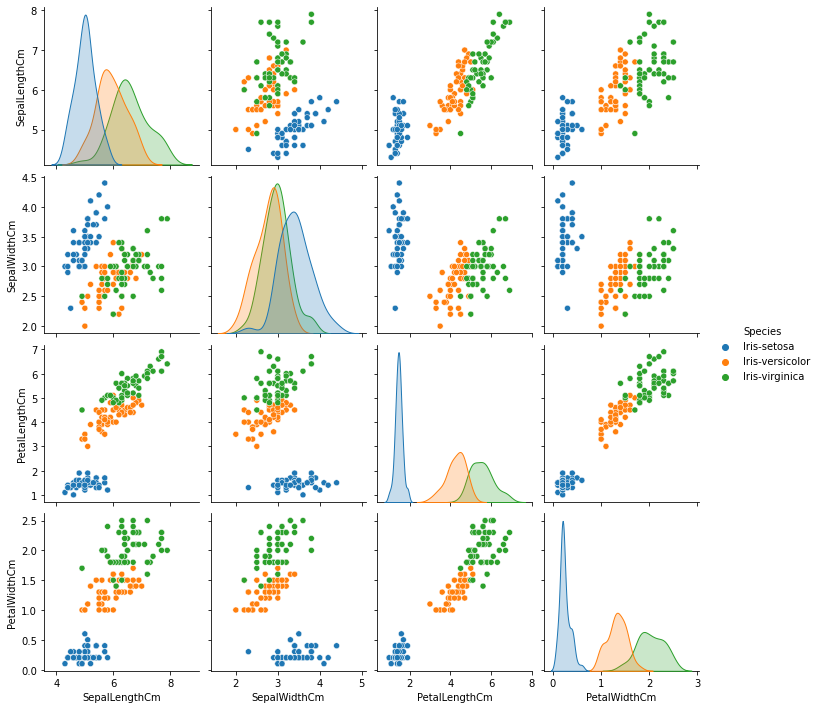

In [12]:
sns.pairplot(a,hue='Species')

### Correlation between the numeric variables

In [13]:
a.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Plotting the correlation using heatmap

<AxesSubplot:>

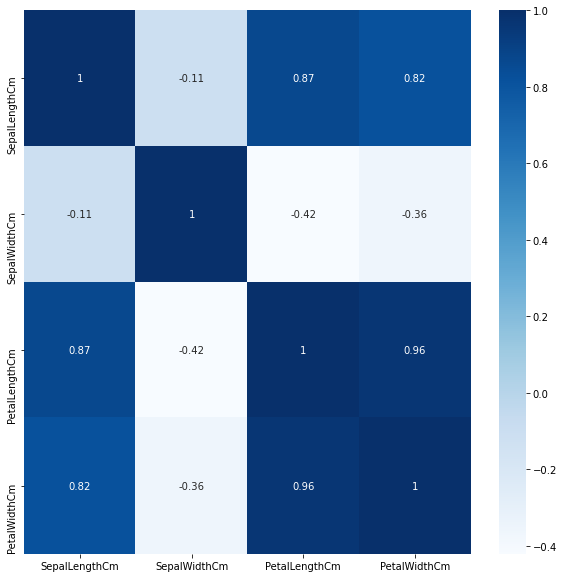

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(a.corr(),cmap='Blues',annot=True)

### Observing the distribution nature of all 4 columns (Using a Distplot)

In [15]:
a.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

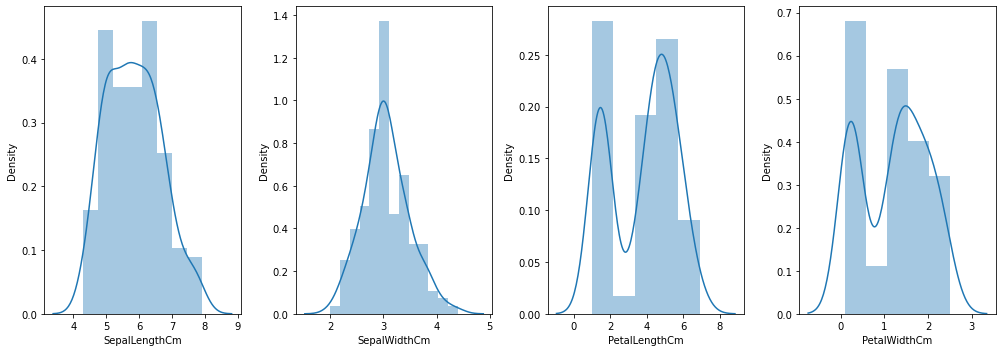

In [18]:
col=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
plt.figure(figsize=(35,5))
i=1
for e in col:
    plt.subplot(1,10,i)
    sns.distplot(a[e])
    i=i+1
plt.tight_layout()
plt.show()

### Observing the distribution of the data across the various columns using a Histogram

In [19]:
a.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* Using the describe() we can see that the maximum value for the columns:
  * Sepal Length=8
  * Sepal Width=5
  * Petal Length=7
  * Petal Width=3
* Hence, we'll set our bin size of the histogram based on the above specified values.

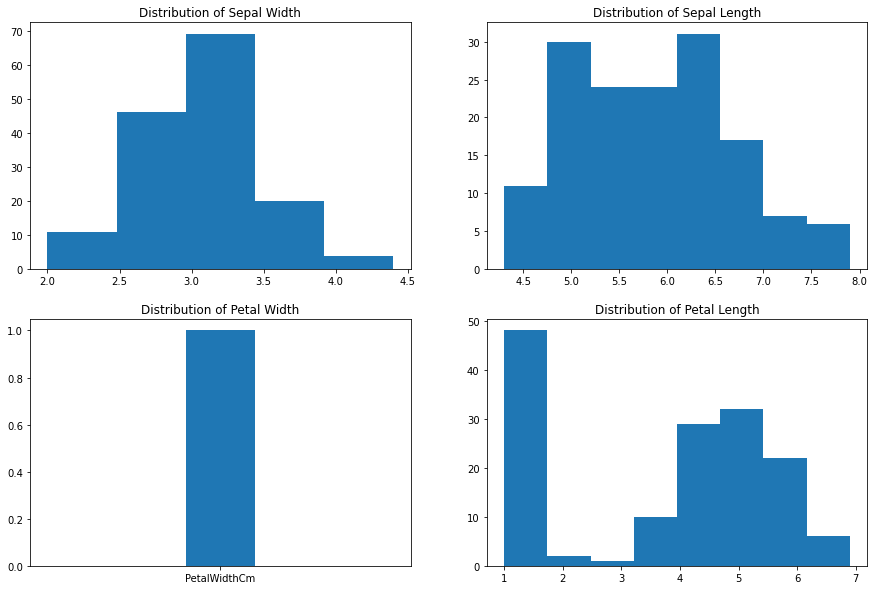

In [23]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(a['SepalWidthCm'],bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(a['SepalLengthCm'],bins=8);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(['PetalWidthCm'],bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(a['PetalLengthCm'],bins=8)
plt.show()

C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

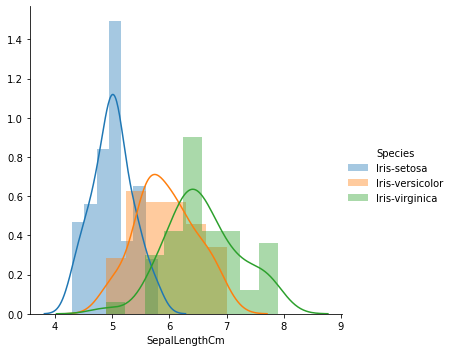

In [25]:
sns.FacetGrid(a,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend()

C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

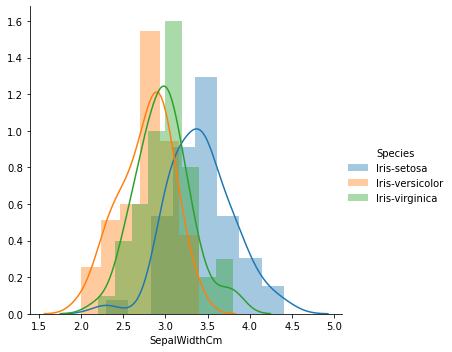

In [26]:
sns.FacetGrid(a,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend()

C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

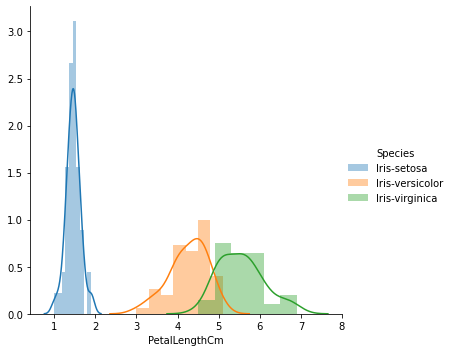

In [27]:
sns.FacetGrid(a,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend()

C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eshit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

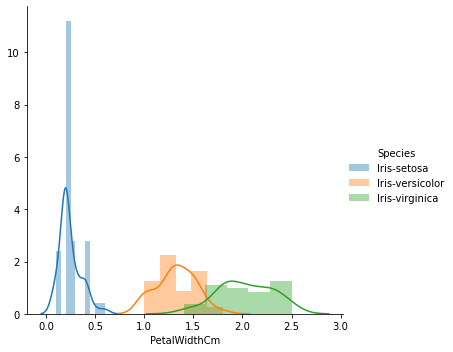

In [28]:
sns.FacetGrid(a,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend()

<AxesSubplot:title={'center':'Distribution of Petal Width'}, xlabel='Species', ylabel='PetalWidthCm'>

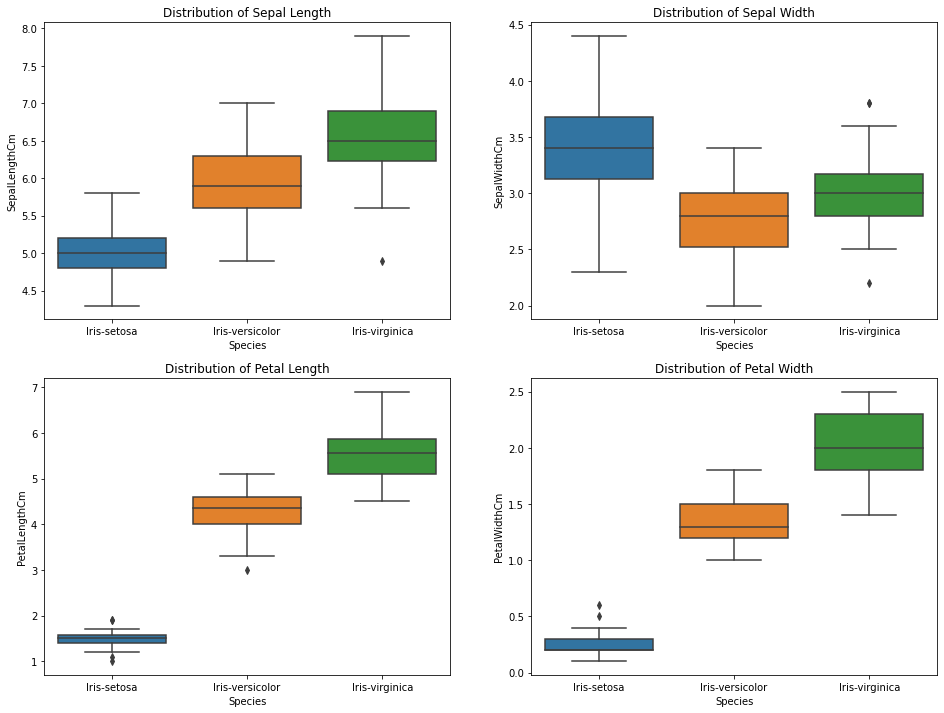

In [30]:
fig,axes=plt.subplots(2,2,figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal Length")
sns.boxplot(y="SepalLengthCm",x="Species",data=a,orient='v',ax=axes[0,0])
axes[0,1].set_title("Distribution of Sepal Width")
sns.boxplot(y="SepalWidthCm",x="Species",data=a,orient='v',ax=axes[0,1])
axes[1,0].set_title("Distribution of Petal Length")
sns.boxplot(y="PetalLengthCm",x="Species",data=a,orient='v',ax=axes[1,0])
axes[1,1].set_title("Distribution of Petal Width")
sns.boxplot(y="PetalWidthCm",x="Species",data=a,orient='v',ax=axes[1,1])

<AxesSubplot:title={'center':'Distribution of Petal Width'}, xlabel='Species', ylabel='PetalWidthCm'>

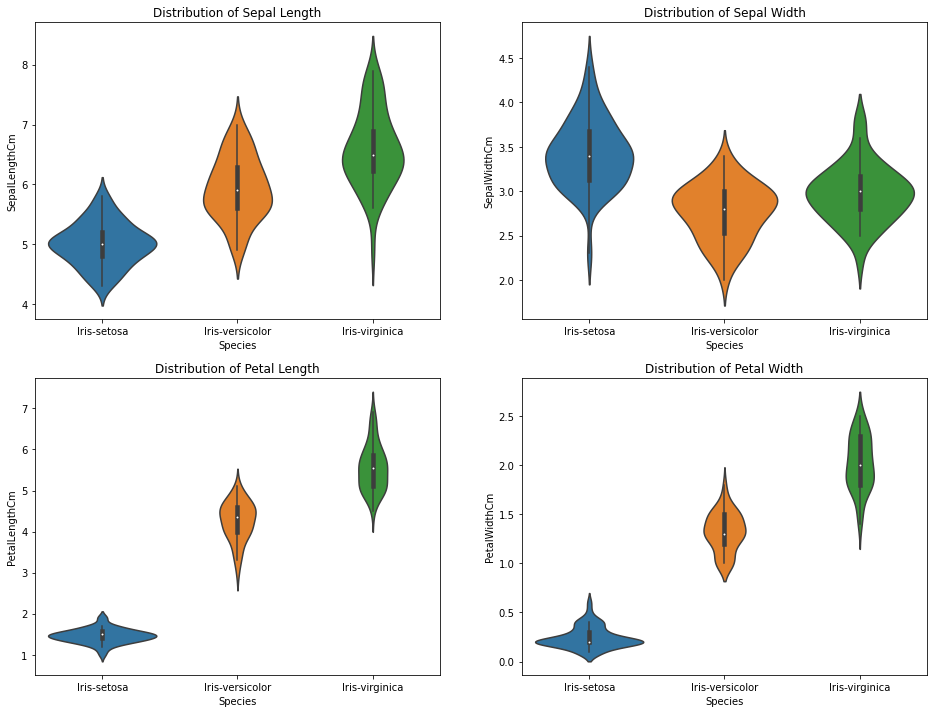

In [31]:
fig,axes=plt.subplots(2,2,figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal Length")
sns.violinplot(y="SepalLengthCm",x="Species",data=a,orient='v',ax=axes[0,0])
axes[0,1].set_title("Distribution of Sepal Width")
sns.violinplot(y="SepalWidthCm",x="Species",data=a,orient='v',ax=axes[0,1])
axes[1,0].set_title("Distribution of Petal Length")
sns.violinplot(y="PetalLengthCm",x="Species",data=a,orient='v',ax=axes[1,0])
axes[1,1].set_title("Distribution of Petal Width")
sns.violinplot(y="PetalWidthCm",x="Species",data=a,orient='v',ax=axes[1,1])